#Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [2]:
x_train, y_train = load_data()
print(f"{type(x_train)} {np.shape(x_train)}\n{x_train}")
print(f"{type(y_train)} {np.shape(y_train)}\n{y_train}")

<class 'numpy.ndarray'> (97,)
[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
<class 'numpy.ndarray'> (97,)
[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.5

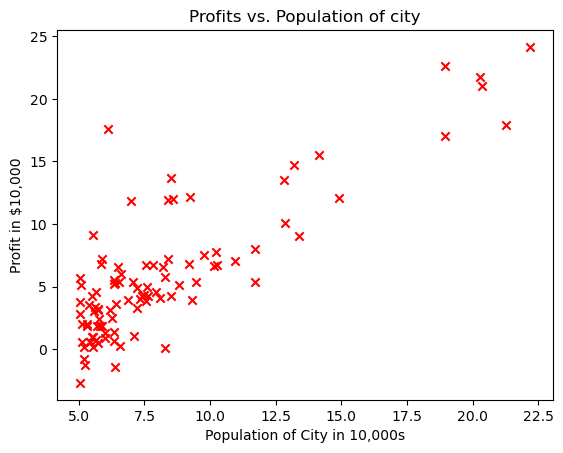

In [3]:
plt.scatter(x_train,y_train, c="r", marker="x")
plt.title("Profits vs. Population of city")
plt.ylabel("Profit in $10,000")
plt.xlabel("Population of City in 10,000s")
plt.show()

#Compute Cost

In [4]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    costi = 0
    for i in range(m):
        f_wb = w * x[i] + b
        costi += (f_wb - y[i])**2
    return costi/(2*m)

#test
cost = compute_cost(x_train,y_train,2,1)
print(type(cost))
print(f"{cost:.3f}")

#public test
from public_tests import *
compute_cost_test(compute_cost)

<class 'numpy.float64'>
75.203
All tests passed!


#Compute Gradient

In [5]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_db = 0
    dj_dw = 0
    for i in range(m):
        f_wb = w*x[i]+b
        dj_db += f_wb - y[i]
        dj_dw += (f_wb - y[i])*x[i]
    return dj_dw/m , dj_db/m

#test with w=0, b=0
tmp_dj_dw , tmp_dj_db = compute_gradient(x_train,y_train,0,0)
print(f"{tmp_dj_dw:.3} {tmp_dj_db:.3}")

#test with w=0.2, b=0.2
tmp_dj_dw , tmp_dj_db = compute_gradient(x_train,y_train,0.2,0.2)
print(f"{tmp_dj_dw:.3} {tmp_dj_db:.3}")

#public test
compute_gradient_test(compute_gradient)

-65.3 -5.84
-47.4 -4.01
Using X with shape (4, 1)
All tests passed!


#Gradient Descent

In [6]:
def gradient_descent(x, y, w_in, b_in, compute_cost, compute_gradient, alpha, itr):
    m = x.shape[0]
    w = copy.deepcopy(w_in)
    b = b_in
    J_history = []
    w_history = []
    for i in range(itr):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        b -= alpha * dj_db
        w -= alpha * dj_dw

        if i < 100000:
            J_history.append(compute_cost(x, y, w, b))
        
        if i % math.ceil(itr/10) == 0:
            print(f"Iterations {i:4}: Cost {float(J_history[-1]):8.2f}")
    return w, b, J_history, w_history

#test
w,b,_,_ = gradient_descent(x_train, y_train, 0, 0, compute_cost,
                            compute_gradient, 0.01, 1500)
print(f"w={w} b={b}")

Iterations    0: Cost     6.74
Iterations  150: Cost     5.31
Iterations  300: Cost     4.96
Iterations  450: Cost     4.76
Iterations  600: Cost     4.64
Iterations  750: Cost     4.57
Iterations  900: Cost     4.53
Iterations 1050: Cost     4.51
Iterations 1200: Cost     4.50
Iterations 1350: Cost     4.49
w=1.166362350335582 b=-3.63029143940436


#Prediction

In [7]:
m = x_train.shape[0]
prediction = np.zeros(m)
for i in range(m):
    prediction[i] = w * x_train[i] + b

#Plotting Linear Model

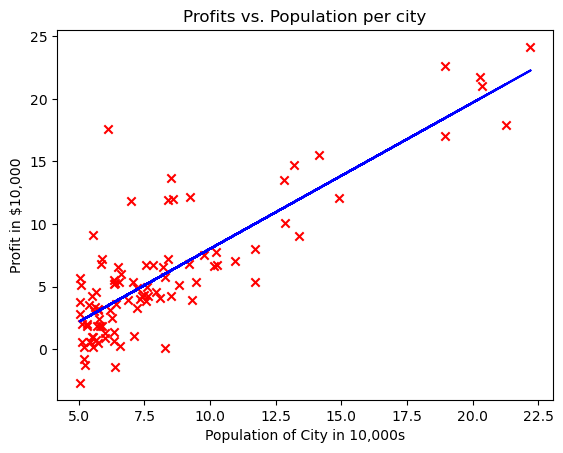

In [8]:
plt.scatter(x_train, y_train, c = "r", marker="x")
plt.plot(x_train, prediction, c="b")
plt.title("Profits vs. Population per city")
plt.ylabel("Profit in $10,000")
plt.xlabel("Population of City in 10,000s")
plt.show()

In [9]:
#profit for a city with population of 35,000
p1 = 3.5 * w + b

#profit for a city with population of 70,000
p2 = 7.0 * w + b

print(f"${(p1 * 10000):.2f} ${(p2 * 10000):.2f}")

$4519.77 $45342.45
